**Visualizing and Predicting Heart Diseases with an Interactive Dash Board**

**Team ID :** PNT2022TMID49153

**Sprint 4**

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

**Data Loading**

In [2]:
from google.colab import files
upload=files.upload()
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [9]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =1)
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
123,65,0,3,160,360,0,2,151,0,0.8,1,0,3
256,61,1,3,150,243,1,0,137,1,1.0,2,0,3
258,64,1,3,140,335,0,0,158,0,0.0,1,0,3
31,66,1,4,160,228,0,2,138,0,2.3,1,0,6
18,64,1,1,110,211,0,2,144,1,1.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,51,1,4,140,299,0,0,173,1,1.6,1,0,7
255,71,0,2,160,302,0,0,162,0,0.4,1,2,3
72,70,1,2,156,245,0,2,143,0,0.0,1,0,3
235,62,0,4,160,164,0,2,145,0,6.2,3,3,7


In [12]:
y_train

123    0
256    0
258    1
31     0
18     0
      ..
203    1
255    0
72     0
235    1
37     1
Name: Heart Disease, Length: 216, dtype: int64

In [13]:
X_train.shape

(216, 13)

In [14]:
y_train.shape

(216,)

In [15]:
X.shape

(270, 13)

In [16]:
y.shape

(270,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 216 records and Testing features have 54 records.


In [18]:
print('--------------Training Set----------------')
print(X_train.shape)
print(y_train.shape)
print('----------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

--------------Training Set----------------
(216, 13)
(216,)
----------------Test Set------------------
(54, 13)
(54,)


**Random Forest Classifier**

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [19]:
from sklearn.metrics import accuracy_score
max_accuracy = 0

for x in range(500):
    rf_classifier = RandomForestClassifier(random_state=x)
    rf_classifier.fit(X_train,y_train)
    Y_pred_rf = rf_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

85.19
135


In [20]:
rf_classifier = RandomForestClassifier(random_state=best_x)
rf_classifier.fit(X_train,y_train)
Y_pred_rf = rf_classifier.predict(X_test)
Y_pred_rf.shape

(54,)

In [21]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)
score_rf

85.19

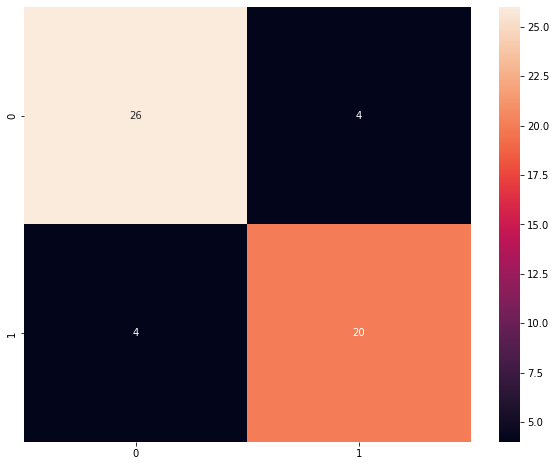

In [34]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
y_pred_rfe = rf_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)




**K Nearest Alogritham**



*   K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

*   K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

*   K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

*   KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.




In [37]:
knn_classifier= KNeighborsClassifier(n_neighbors=31,leaf_size=30)
knn_classifier.fit(X_train,y_train)
Y_pred_knn = knn_classifier.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
score_knn

64.81

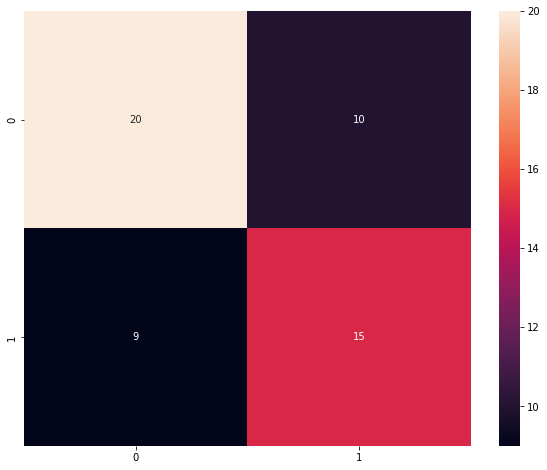

In [39]:
y_pred_knne = knn_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(y_test,y_pred_knne)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
